# Time Series Forecasting with Python (ARIMA, LSTM, Prophet)

In [3]:
%pip install -U pmdarima

  Using cached pmdarima-1.8.2-cp37-cp37m-win_amd64.whl (591 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")

In this article we will try to forecast a time series data basically. We'll build three different model with Python and inspect their results. Models we will use are ARIMA (Autoregressive Integrated Moving Average), LSTM (Long Short Term Memory Neural Network) and Facebook Prophet. Let's jump in and start with ARIMA.

## ARIMA (Autoregressive Integrated Moving Average)

ARIMA is a model which is used for predicting future trends on a time series data. It is model that form of regression analysis. 
* **AR (Autoregression) :** Model that shows a changing variable that regresses on its own lagged/prior values.
* **I (Integrated) :**  Differencing of raw observations to allow for the time series to become stationary
* **MA (Moving average) :** Dependency between an observation and a residual error from a moving average model

For ARIMA models, a standard notation would be ARIMA with p, d, and q, where integer values substitute for the parameters to indicate the type of ARIMA model used.

* **p:** the number of lag observations in the model; also known as the lag order.
* **d:** the number of times that the raw observations are differenced; also known as the degree of differencing.
* **q:** the size of the moving average window; also known as the order of the moving average.

For more information about ARIMA you can check:
<br>
[What is ARIMA](https://www.quora.com/What-is-ARIMA)
<br>
[Autoregressive Integrated Moving Average (ARIMA)](https://www.investopedia.com/terms/a/autoregressive-integrated-moving-average-arima.asp)

## LSTM Neural Network

> LSTM stands for long short term memory. It is a model or architecture that extends the memory of recurrent neural networks. Typically, recurrent neural networks have ‘short term memory’ in that they use persistent previous information to be used in the current neural network. Essentially, the previous information is used in the present task. That means we do not have a list of all of the previous information available for the neural node.
> LSTM introduces long-term memory into recurrent neural networks. It mitigates the vanishing gradient problem, which is where the neural network stops learning because the updates to the various weights within a given neural network become smaller and smaller. It does this by using a series of ‘gates’. These are contained in memory blocks which are connected through layers, like this:

![](https://hub.packtpub.com/wp-content/uploads/2018/04/LSTM-696x494.png)

> LSTM work
There are three types of gates within a unit:
Input Gate: Scales input to cell (write)
Output Gate: Scales output to cell (read)
Forget Gate: Scales old cell value (reset)
Each gate is like a switch that controls the read/write, thus incorporating the long-term memory function into the model.

For more detail:
<br>
[What is LSTM?](https://hub.packtpub.com/what-is-lstm/)
<br>
[What is LSTM? - Quora](https://www.quora.com/What-is-LSTM)
<br>
[Wikipedia](https://en.wikipedia.org/wiki/Long_short-term_memory)

## Prophet

> Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

[Facebook's Prophet Web Page](https://facebook.github.io/prophet/)<br>
[Forecasting at Scale](https://peerj.com/preprints/3190.pdf)


# FORECAST

## Read Dataset

In [5]:
df = pd.read_csv('datos_entrenar.csv')

In [6]:
df.head()

Fecha  26055100  26055120  26085160  26085170  Inundacion
0  2016-12-31 15:00:00       0.0       0.0       0.0       0.0         0.0
1  2016-12-31 16:00:00       0.1       0.0       0.0       0.0         0.0
2  2016-12-31 17:00:00       0.0       0.7       0.0       0.0         0.0
3  2016-12-31 18:00:00       0.0       0.4       0.0       0.0         0.0
4  2016-12-31 19:00:00       0.0       0.3       0.0       0.0         0.0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30657 entries, 0 to 30656
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fecha       30657 non-null  object 
 1   26055100    30657 non-null  float64
 2   26055120    30657 non-null  float64
 3   26085160    30657 non-null  float64
 4   26085170    30657 non-null  float64
 5   Inundacion  30657 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.4+ MB


In [9]:
df.Fecha = pd.to_datetime(df.Fecha)

In [10]:
df = df.set_index("Fecha")
df.head()

26055100  26055120  26085160  26085170  Inundacion
Fecha                                                                  
2016-12-31 15:00:00       0.0       0.0       0.0       0.0         0.0
2016-12-31 16:00:00       0.1       0.0       0.0       0.0         0.0
2016-12-31 17:00:00       0.0       0.7       0.0       0.0         0.0
2016-12-31 18:00:00       0.0       0.4       0.0       0.0         0.0
2016-12-31 19:00:00       0.0       0.3       0.0       0.0         0.0

In [ ]:
df.index.freq = 'MS'

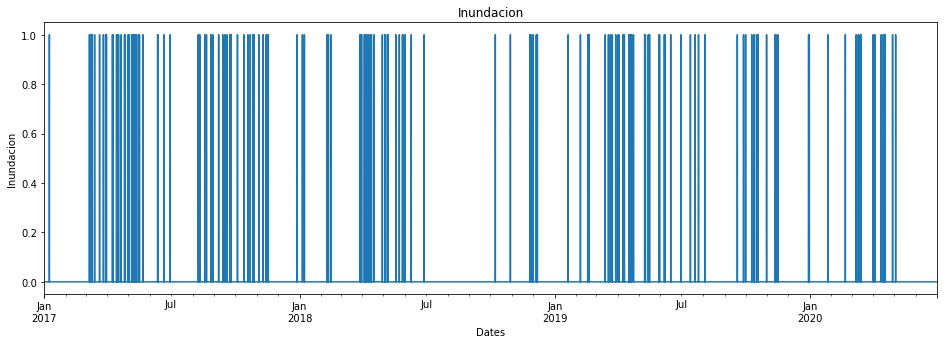

In [12]:
ax = df['Inundacion'].plot(figsize = (16,5), title = "Inundacion")
ax.set(xlabel='Dates', ylabel='Inundacion');

When we look at plot we can sey there is a seasonality in data. That's why we will use SARIMA (Seasonal ARIMA) instead of ARIMA.

> Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.
> It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.

> There are four seasonal elements that are not part of ARIMA that must be configured; they are:<br>
**P:** Seasonal autoregressive order.<br>
**D:** Seasonal difference order.<br>
**Q:** Seasonal moving average order.<br>
**m:** The number of time steps for a single seasonal period.<br>

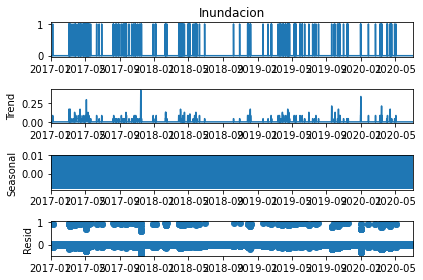

In [13]:
a = seasonal_decompose(df["Inundacion"], model = "add")
a.plot();

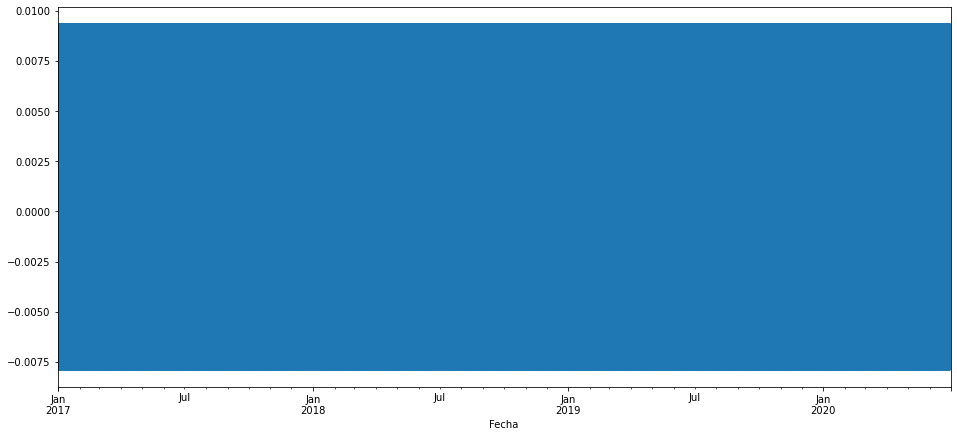

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

## ARIMA Forecast

Let's run auto_arima() function to get best p,d,q,P,D,Q values

In [15]:
auto_arima(df['Inundacion'], seasonal=True, m=12,max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                30657
Model:               SARIMAX(4, 0, 0)   Log Likelihood               31945.010
Date:                Wed, 25 Aug 2021   AIC                         -63878.020
Time:                        00:08:40   BIC                         -63828.037
Sample:                             0   HQIC                        -63861.999
                              - 30657                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0051      0.002      2.586      0.010       0.001       0.009
ar.L1          0.3969      0.002    200.275      0.000       0.393       0.401
ar.L2         -0.0302      0.002    -13.594      0.000      -0.035      -0.026
ar.L3          0.0213      0.004      5.482      0.000       0.014       0.029
ar.L4          0.0196      0.004      4.642      0.000       0.011       0.028
sigma2         0.0073   2.81e-05    259.340      0.000       0.007       0.007
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          14418140.92
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                             9.00
Prob(H) (two-sided):                  0.00   Kurtosis:                       107.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

As we can see best arima model chosen by auto_arima() is SARIMAX(2, 1, 1)x(4, 0, 3, 12)

Let's split the data into train and test set

In [27]:
train_data = df[:len(df)-5000]
test_data = df[len(df)-5000:]

In [28]:
arima_model = SARIMAX(train_data['Inundacion'], order = (2,1,1), seasonal_order = (4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                 Inundacion   No. Observations:                25657
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood               26047.543
Date:                                    Wed, 25 Aug 2021   AIC                         -52073.085
Time:                                            00:33:18   BIC                         -51983.407
Sample:                                        12-31-2016   HQIC                        -52044.095
                                             - 12-05-2019                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3650      0.001    253.859      0.000       0.362       0.368
ar.L2         -0.0207      0.002     -9.220      0.000      -0.025      -0.016
ma.L1         -0.9981      0.000  -2646.404      0.000      -0.999      -0.997
ar.S.L12      -0.0168      2.091     -0.008      0.994      -4.116       4.082
ar.S.L24       0.0994      0.763      0.130      0.896      -1.395       1.594
ar.S.L36       0.1331      0.874      0.152      0.879      -1.581       1.847
ar.S.L48       0.0036      0.013      0.270      0.787      -0.023       0.030
ma.S.L12       0.0260      2.091      0.012      0.990      -4.072       4.124
ma.S.L24      -0.0875      0.752     -0.116      0.907      -1.561       1.387
ma.S.L36      -0.1325      0.855     -0.155      0.877      -1.807       1.543
sigma2         0.0077   1.02e-05    752.484      0.000       0.008       0.008
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):          11079005.18
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                             8.99
Prob(H) (two-sided):                  0.00   Kurtosis:                       103.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

2019-12-05 16:00:00    0.003040
2019-12-05 17:00:00    0.004150
2019-12-05 18:00:00    0.004492
2019-12-05 19:00:00    0.004594
2019-12-05 20:00:00    0.004624
                         ...   
2020-06-30 19:00:00    0.004786
2020-06-30 20:00:00    0.004786
2020-06-30 21:00:00    0.004786
2020-06-30 22:00:00    0.004786
2020-06-30 23:00:00    0.004786
Freq: H, Name: ARIMA Predictions, Length: 5000, dtype: float64

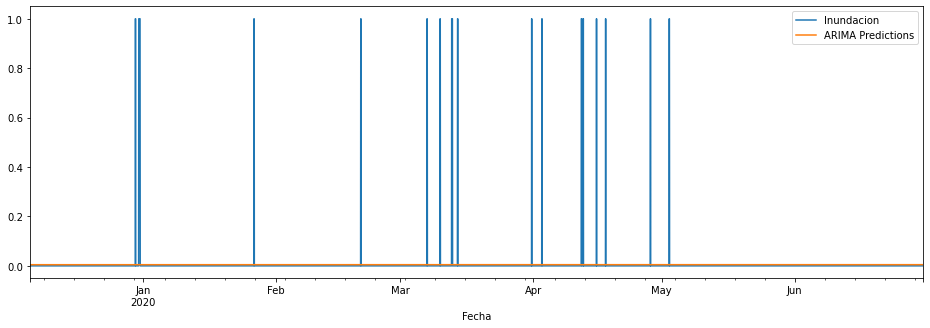

In [30]:
test_data['Inundacion'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [20]:
arima_rmse_error = rmse(test_data['Inundacion'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['Inundacion'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 1.2207206222982963e-06
RMSE Error: 0.0011048622639489034
Mean: 0.008676648073849366
